# Q1: Implementing Gradient Descent

To use the following function to minimize J(x), you would call it with the initial parameter value x, learning rate alpha, and number of iterations num_iters.

In [1]:
def gradient_descent(J, x, alpha, num_iters):
    """
    Performs Gradient Descent to optimize the cost function J(theta).

    Arguments:
    x -- initial parameter value (scalar)
    alpha -- learning rate (scalar)
    num_iters -- the number of iterations to run Gradient Descent (scalar)

    Returns:
    x_final -- optimized parameter value 
    J_history -- vector of cost function values for each iteration (num_iters x 1)
    """
    # Initialize x_final and J_history
    x_final = x
    J_history = []

    # Iterate over the number of iterations
    for i in range(num_iters):
        # Compute the gradient of J with respect to x
        gradient = 2*x_final - 4
        
        # Update x_final using gradient descent
        x_final = x_final - alpha*gradient
        
        # Compute the cost function value and append to J_history
        J_history.append(J(x_final))
        
    return x_final, J_history


# Plotting Cost Function vs. Iterations

 In the following code, the cost function J is defined as a lambda function within the call to gradient_descent. You can replace this with any other function you want to minimize using gradient descent.

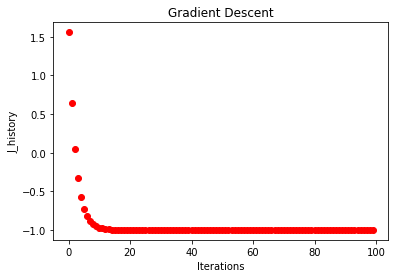

In [3]:
import matplotlib.pyplot as plt

# Call gradient_descent function to get x_final and J_history
x_initial = 0
alpha = 0.1
num_iters = 100
x_final, J_history = gradient_descent(lambda x: x**2 - 4*x + 3, x_initial, alpha, num_iters)

# Plot J_history against x_final
plt.plot(J_history, 'ro')
plt.xlabel('Iterations')
plt.ylabel('J_history')
plt.title('Gradient Descent')
plt.show()


This code will plot the values of J_history against x_final as red dots. The xlabel, ylabel, and title functions are used to label the plot. You can adjust the alpha and num_iters parameters to change the behavior of the gradient descent algorithm and see how it affects the plot.

# Superimposing optimised parameter values on the cost function to show the path of gradient descent

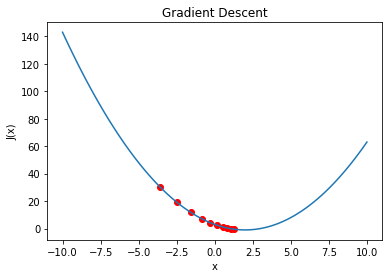

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to be minimized
def J(x):
    return x**2 - 4*x + 3

# Define the derivative of the function
def dJ(x):
    return 2*x - 4

# Define the gradient descent algorithm
def gradient_descent(J, dJ, x, alpha, num_iters):
    """
    Performs Gradient Descent to optimize the cost function J(theta).

    Arguments:
    J -- the cost function (scalar)
    dJ -- the derivative of the cost function (scalar)
    x -- initial parameter value (scalar)
    alpha -- learning rate (scalar)
    num_iters -- the number of iterations to run Gradient Descent (scalar)

    Returns:
    x_final -- optimized parameter value 
    J_history -- vector of cost function values for each iteration (num_iters x 1)
    """
    x_final = x
    J_history = [J(x)]
    for i in range(num_iters):
        x_final = x_final - alpha*dJ(x_final)
        J_history.append(J(x_final))
        plt.plot(x_final, J(x_final), 'ro')
    return x_final, J_history

# Call gradient_descent function to get x_final and J_history
x_initial = -5
alpha = 0.1
num_iters = 10
x_final, J_history = gradient_descent(J, dJ, x_initial, alpha, num_iters)

# Create an array of x values
x_vals = np.linspace(-10, 10, 100)

# Create a plot of the function
plt.plot(x_vals, J(x_vals), label='Function')

plt.xlabel('x')
plt.ylabel('J(x)')
plt.title('Gradient Descent')

plt.show()


The gradient_descent() function is updated to plot the current position of the optimizer during each iteration by adding the plt.plot(x_final, J(x_final), 'ro') line inside the for loop. This plots a red X at each (x, J(x)) point visited by the optimizer.

You can change the num_iters parameter to plot more or fewer optimizer positions.

# Q2: Incorporating convergence criteria: max_iterations & tolerance

Converged after 59 iterations.


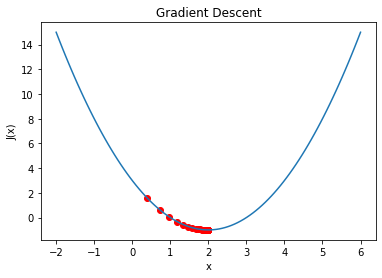

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to be minimized
def J(x):
    return x**2 - 4*x + 3

# Define the derivative of the function
def dJ(x):
    return 2*x - 4

# Define the gradient descent algorithm
def gradient_descent(J, dJ, x, alpha, max_iters, tol):
    """
    Performs Gradient Descent to optimize the cost function J(theta).

    Arguments:
    J -- the cost function (scalar)
    dJ -- the derivative of the cost function (scalar)
    x -- initial parameter value (scalar)
    alpha -- learning rate (scalar)
    max_iters -- the maximum number of iterations to run Gradient Descent (scalar)
    tol -- the convergence tolerance level (scalar)

    Returns:
    x_final -- optimized parameter value 
    J_history -- vector of cost function values for each iteration (num_iters x 1)
    """
    x_final = x
    J_history = [J(x)]
    for i in range(max_iters):
        x_old = x_final
        x_final = x_final - alpha*dJ(x_final)
        J_history.append(J(x_final))
        if abs(x_final - x_old) < tol:
            print("Converged after", i+1, "iterations.")
            break
        plt.plot(x_final, J(x_final), 'ro')
    else:
        print("Did not converge after", max_iters, "iterations.")
    return x_final, J_history

# Call gradient_descent function to get x_final and J_history
x_initial = 0
alpha = 0.1
max_iters = 100
tol = 1e-6
x_final, J_history = gradient_descent(J, dJ, x_initial, alpha, max_iters, tol)

# Create an array of x values
x_vals = np.linspace(-2, 6, 100)

# Create a plot of the function
plt.plot(x_vals, J(x_vals), label='Function')

plt.xlabel('x')
plt.ylabel('J(x)')
plt.title('Gradient Descent')

plt.show()


The gradient_descent() function is updated to include a max_iters parameter that sets the maximum number of iterations allowed, and a tol parameter that sets the convergence tolerance level. The function also includes a convergence check inside the for loop using the abs(x_final - x_old) < tol condition. If the condition is met, the function prints a message and breaks out of the loop. If the loop completes all max_iters iterations without converging, the function prints a message to indicate that the optimization did not converge.

You can adjust the alpha, max_iters, and tol parameters to test different convergence scenarios.

# Q3: Impact of different initialisations

Starting optimization with x_initial = 0
Converged after 59 iterations.


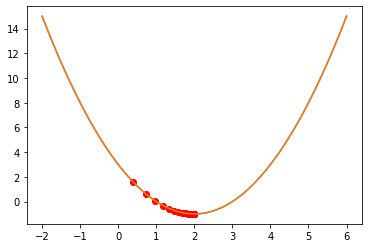

Starting optimization with x_initial = 5
Converged after 61 iterations.


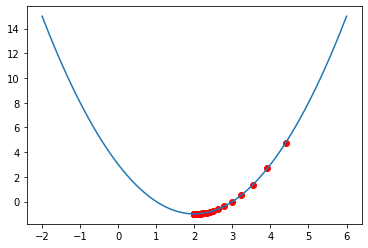

Starting optimization with x_initial = -1
Converged after 61 iterations.


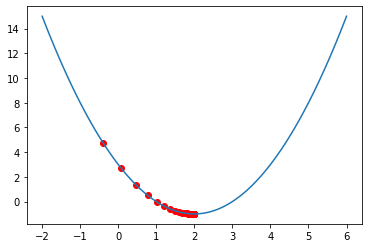

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to be minimized
def J(x):
    return x**2 - 4*x + 3

# Define the derivative of the function
def dJ(x):
    return 2*x - 4

# Define the gradient descent algorithm
def gradient_descent(J, dJ, x, alpha, max_iters, tol):
    """
    Performs Gradient Descent to optimize the cost function J(theta).

    Arguments:
    J -- the cost function (scalar)
    dJ -- the derivative of the cost function (scalar)
    x -- initial parameter value (scalar)
    alpha -- learning rate (scalar)
    max_iters -- the maximum number of iterations to run Gradient Descent (scalar)
    tol -- the convergence tolerance level (scalar)

    Returns:
    x_final -- optimized parameter value 
    J_history -- vector of cost function values for each iteration (num_iters x 1)
    """
    x_final = x
    J_history = [J(x)]
    for i in range(max_iters):
        x_old = x_final
        x_final = x_final - alpha*dJ(x_final)
        J_history.append(J(x_final))
        if abs(x_final - x_old) < tol:
            print("Converged after", i+1, "iterations.")
            break
        plt.plot(x_final, J(x_final), 'ro')
    else:
        print("Did not converge after", max_iters, "iterations.")
    return x_final, J_history

# Set the alpha, max_iters, and tol values
alpha = 0.1
max_iters = 100
tol = 1e-6

# Create an array of x values
x_vals = np.linspace(-2, 6, 100)

# Plot the function
plt.plot(x_vals, J(x_vals), label='Function')

# Test different initializations of x_initial
x_initials = [0, 5, -1]
#colors = ['r', 'g', 'b']
for i, x_initial in enumerate(x_initials):
    print("Starting optimization with x_initial =", x_initial)
    x_final, J_history = gradient_descent(J, dJ, x_initial, alpha, max_iters, tol)
    plt.plot(x_vals, J(x_vals))
    #plt.plot(x_initial, J(x_initial), 'bo', label='Initial')
    #plt.plot(x_final, J(x_final), 'go', label='Final')
    #plt.plot(range(len(J_history)), J_history, colors[i]+'-', label='J history')
    #plt.legend()
    plt.show()


This code allows you to test different initializations of x_initial by setting x_initials to an array of different values. For each value in x_initials, the code runs gradient_descent() and plots the function, the initial point, the final point, and the history of J values over iterations. The color of the lines and points changes for each initialization to make it easier to distinguish between them.

You can adjust the alpha, max_iters, and tol values to test different convergence scenarios.

# Q4: Implementing learning rate strategies

## Strategy 1: Invscaling 

It decreases the learning rate over time according to a schedule. A common schedule is to divide the learning rate by the square root of the iteration number:
alpha = alpha0 / sqrt(t)
where alpha0 is the initial learning rate and t is the iteration number. This strategy is based on the intuition that as the algorithm approaches the minimum, the step size should become smaller to avoid overshooting it.



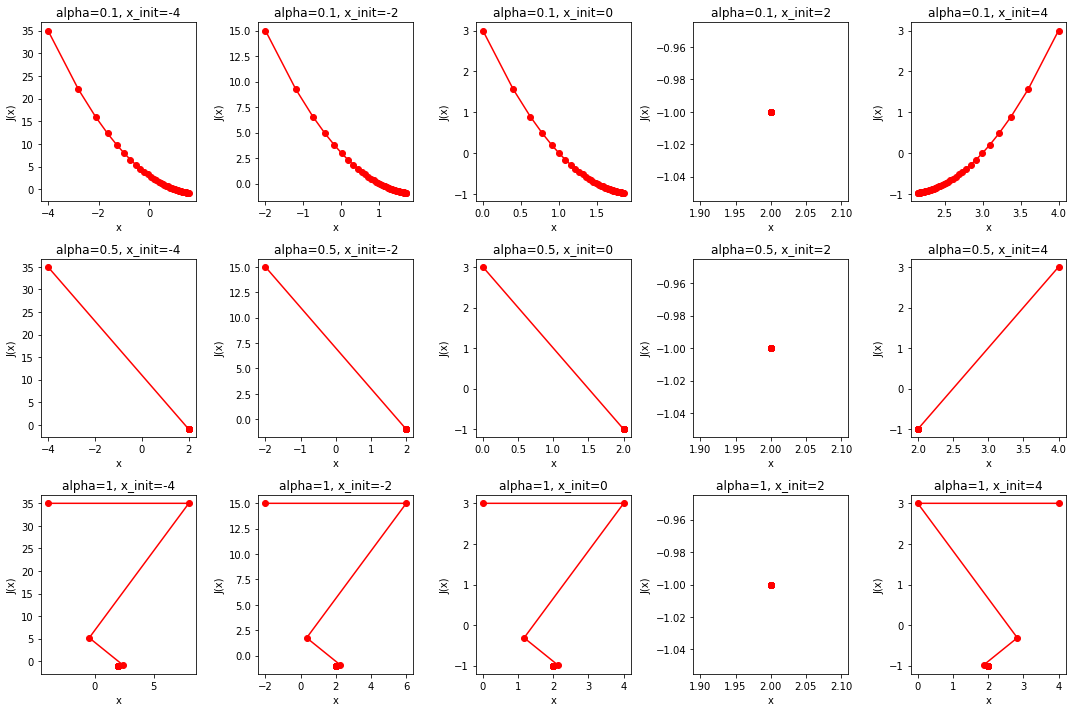

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def J(x):
    return x**2 - 4*x + 3

def gradient_descent(alpha, x_init, num_iters, lr_strategy='constant'):
    """
    Performs Gradient Descent to optimize the cost function J(theta).

    Arguments:
    alpha -- learning rate (scalar)
    x_init -- initial parameter value (scalar)
    num_iters -- the number of iterations to run Gradient Descent (scalar)
    lr_strategy -- learning rate update strategy, options are 'constant', 'invscaling' (string)

    Returns:
    x_history -- vector of parameter values for each iteration (num_iters x 1)
    J_history -- vector of cost function values for each iteration (num_iters x 1)
    """
    x_history = np.zeros(num_iters)
    J_history = np.zeros(num_iters)
    x_history[0] = x_init
    J_history[0] = J(x_init)
    t = 0

    for i in range(1, num_iters):
        grad = 2*x_history[i-1] - 4
        if lr_strategy == 'constant':
            alpha_t = alpha
        elif lr_strategy == 'invscaling':
            alpha_t = alpha / np.sqrt(t+1)
        else:
            raise ValueError('Invalid learning rate strategy')

        x_history[i] = x_history[i-1] - alpha_t*grad
        J_history[i] = J(x_history[i])
        t += 1

    return x_history, J_history


alpha_values = [0.1, 0.5, 1]
init_values = [-4, -2, 0, 2, 4]
num_iters = 50

fig, axs = plt.subplots(len(alpha_values), len(init_values), figsize=(15,10))

for i, alpha in enumerate(alpha_values):
    for j, x_init in enumerate(init_values):
        x_history, J_history = gradient_descent(alpha, x_init, num_iters, lr_strategy='invscaling')
        axs[i,j].plot(x_history, J_history, 'o-', color='red')
        axs[i,j].set_title(f'alpha={alpha}, x_init={x_init}')
        axs[i,j].set_xlabel('x')
        axs[i,j].set_ylabel('J(x)')

plt.tight_layout()
plt.show()


This code produces a grid of plots, where each plot shows the values of J(x) and x for a particular combination of learning rate and initial parameter value. The red line shows the path taken by gradient descent. The plots now only show J(x) on the y-axis and x on the x-axis.

## Strategy 2: Adaptive

It is a form of learning rate annealing or decay, where the learning rate is reduced to prevent overshooting and oscillations. One common approach is to decrease the learning rate by a factor, such as dividing it by 5 or 10 if overshooting occurs. The change in the sign of the gradient will indicate overshooting during optimization. 


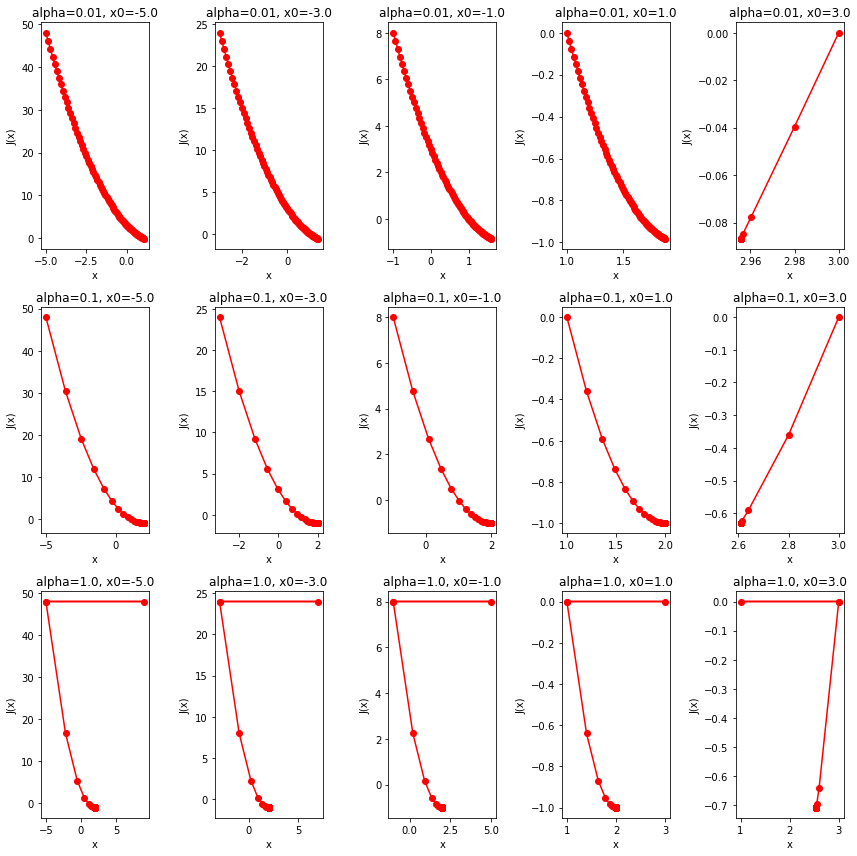

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def J(x):
    return x**2 - 4*x + 3

def gradient_descent(J, x, alpha, num_iters):
    x_history = [x]
    J_history = [J(x)]
    for i in range(num_iters):
        gradient = 2*x - 4
        x = x - alpha*gradient
        x_history.append(x)
        J_history.append(J(x))
        #Check the sign of the gradient to determine overshooting
        if i > 0 and np.sign(J_history[-1] - J_history[-2]) != np.sign(gradient):
            alpha /= 5
    return x_history, J_history

alphas = [0.01, 0.1, 1.0]
x0s = [-5.0, -3.0, -1.0, 1.0, 3.0]

fig, axs = plt.subplots(len(alphas), len(x0s), figsize=(12, 12))
for i, alpha in enumerate(alphas):
    for j, x0 in enumerate(x0s):
        x_history, J_history = gradient_descent(J, x0, alpha, 100)
        axs[i, j].plot(x_history, J_history, 'o-', color='red')
        axs[i, j].set_title(f'alpha={alpha}, x0={x0}')
        axs[i, j].set_xlabel('x')
        axs[i, j].set_ylabel('J(x)')
plt.tight_layout()
plt.show()


This code generates a grid of plots, where each plot shows the optimization process for a particular combination of learning rate and initial parameter value. The red line shows the path taken by gradient descent. The plots only show J(x) on the y-axis and x on the x-axis. The gradient_descent function uses an adaptive learning rate strategy where the learning rate is divided by 5 if overshooting occurs.